# Implementation Part 2

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## PCA

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline 
np.random.seed = 1
N = 1000
fs = 500
w = np.arange(1,N+1) * 2 * np.pi/fs
t = np.arange(1,N+1)/fs
x = 0.75 * np.sin(w*5)
y = signal.sawtooth(w*7, 0.5)
d1 = 0.5*y   + 0.5*x   + 0.1*np.random.rand(1,N)
d2 = 0.2*y   + 0.75*x  + 0.15*np.random.rand(1,N)
d3 = 0.7*y   + 0.25*x  + 0.1*np.random.rand(1,N)
d4 = -0.5*y  + 0.4*x   + 0.2*np.random.rand(1,N)
d5 = 0.6*np.random.rand(1,N)


d1 = d1 - d1.mean()
d2 = d2 - d2.mean()
d3 = d3 - d3.mean()
d4 = d4 - d4.mean()
d5 = d5 - d5.mean()




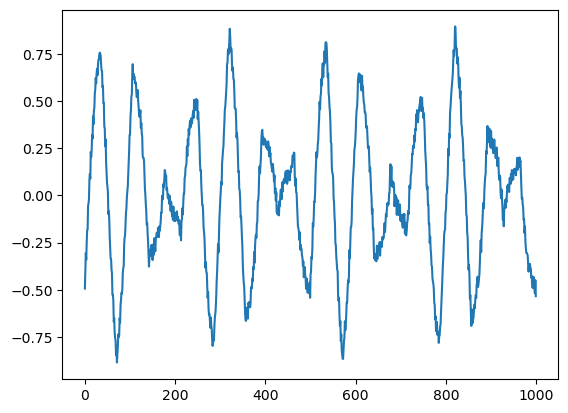

In [3]:
plt.plot(d1.transpose())

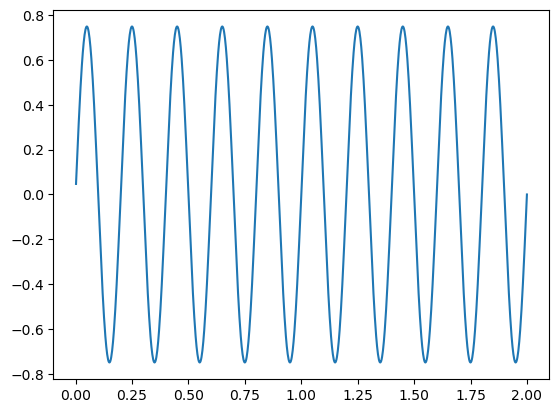

In [4]:
plt.plot(t, x)

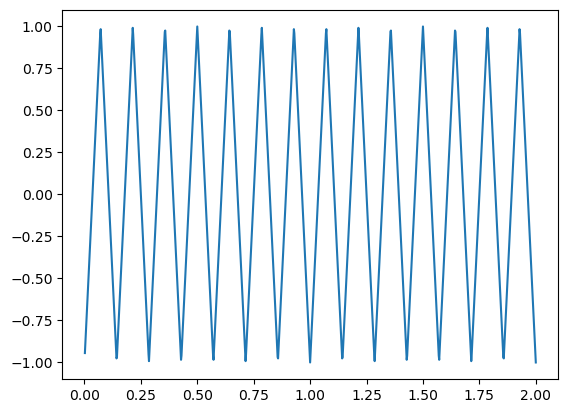

In [5]:
plt.plot(t, y)

In [6]:
import numpy as np
X = np.array([d1[0], d2[0], d3[0], d4[0], d5[0]])
X

array([[-0.49408292, -0.4092141 , -0.30629693, ..., -0.51926778,
        -0.44901187, -0.53435394],
       [-0.16352946, -0.10604595, -0.06153767, ..., -0.30872698,
        -0.15980381, -0.19516993],
       [-0.66776028, -0.5933727 , -0.54097249, ..., -0.68479295,
        -0.69051812, -0.71700779],
       [ 0.51591639,  0.51422744,  0.43256386, ...,  0.46388117,
         0.37693703,  0.44919931],
       [-0.26712568, -0.24424973,  0.07920651, ..., -0.27460727,
         0.23269171,  0.20275485]])

In [7]:
X.shape

(5, 1000)

In [8]:
U,S,V = np.linalg.svd(X)
S

array([20.90093243, 14.35143573,  5.45792701,  1.45806771,  0.90771162])

In [9]:
eigen = S**2
eigen

array([436.84897645, 205.96370738,  29.78896728,   2.12596145,
         0.82394039])

In [10]:
eigen

array([436.84897645, 205.96370738,  29.78896728,   2.12596145,
         0.82394039])

In [11]:
for i in range(5):
    V[:,i] = V[:,i] * np.sqrt(eigen[i])



In [12]:
eigen = eigen/N
eigen = eigen/sum(eigen)

In [13]:
eigen

array([0.64665528, 0.30488229, 0.04409577, 0.003147  , 0.00121966])

### Scree plot
Gives the measure of the associated principal component's importance with regards to how much of the total information it represents. 


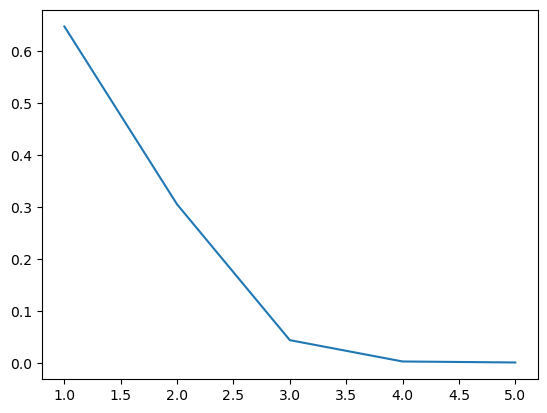

In [14]:
plt.plot(range(1,6), eigen)

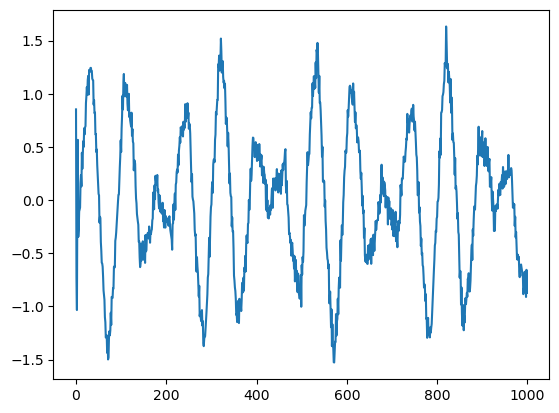

In [15]:

plt.plot(V[:,0])
plt.show()

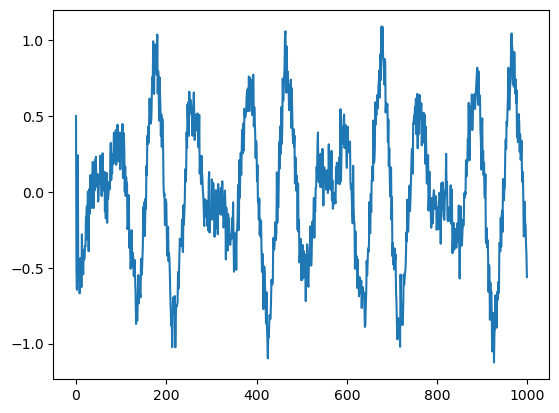

In [16]:
plt.plot(V[:,1])
plt.show()

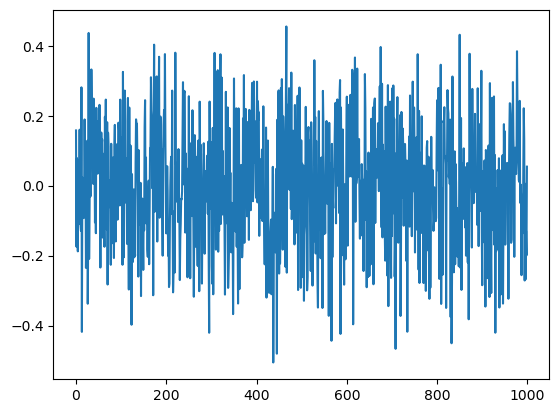

In [17]:
plt.plot(V[:,2])
plt.show()

### PCA on Iris Data

<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Sepal length')

Text(0, 0.5, 'Sepal width')

(3.8, 8.4)

(1.5, 4.9)

([], [])

([], [])

Text(0.5, 0.92, 'First three PCA directions')

Text(0.5, 0, '1st eigenvector')

/var/folders/3m/snssywpx56b_nwy1f1jy103h0000gn/T/ipykernel_31558/1367415577.py:37: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])


[Text(-4.0, 0, ''),
 Text(-3.0, 0, ''),
 Text(-2.0, 0, ''),
 Text(-1.0, 0, ''),
 Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, '')]

Text(0.5, 0.5, '2nd eigenvector')

/var/folders/3m/snssywpx56b_nwy1f1jy103h0000gn/T/ipykernel_31558/1367415577.py:39: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])


[Text(-1.5, 0, ''),
 Text(-1.0, 0, ''),
 Text(-0.5, 0, ''),
 Text(0.0, 0, ''),
 Text(0.5, 0, ''),
 Text(1.0, 0, ''),
 Text(1.5, 0, ''),
 Text(2.0, 0, '')]

Text(0.5, 0, '3rd eigenvector')

/var/folders/3m/snssywpx56b_nwy1f1jy103h0000gn/T/ipykernel_31558/1367415577.py:41: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(-0.8, 0, ''),
 Text(-0.6000000000000001, 0, ''),
 Text(-0.4, 0, ''),
 Text(-0.19999999999999996, 0, ''),
 Text(0.0, 0, ''),
 Text(0.19999999999999996, 0, ''),
 Text(0.40000000000000013, 0, ''),
 Text(0.6000000000000001, 0, ''),
 Text(0.8, 0, ''),
 Text(1.0, 0, '')]

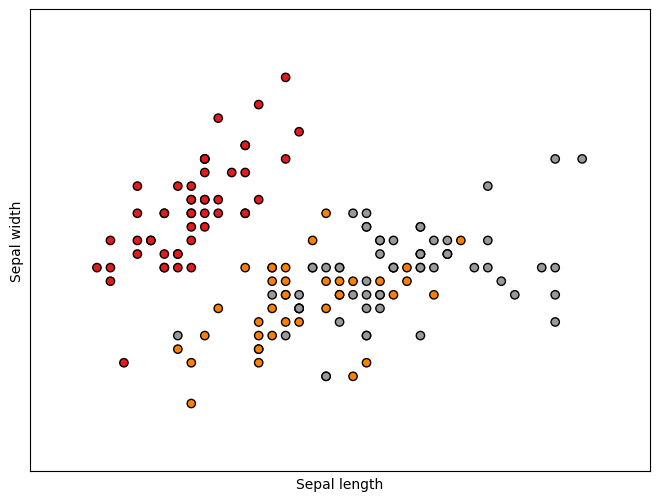

<Figure size 800x600 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [19]:
iris = datasets.load_iris()
X = iris.data[:50,:] 

In [20]:
X2 = X +0.05*np.random.rand(50,4)

In [21]:
X_combined = np.zeros((50,8))

In [22]:
X_combined[:,0:4] = X
X_combined[:,4:] = X2

In [23]:
X_combined

array([[5.1       , 3.5       , 1.4       , 0.2       , 5.11089177,
        3.52724556, 1.40498601, 0.24884079],
       [4.9       , 3.        , 1.4       , 0.2       , 4.93994691,
        3.02659023, 1.42869733, 0.22021777],
       [4.7       , 3.2       , 1.3       , 0.2       , 4.70752501,
        3.21556406, 1.32993174, 0.20595653],
       [4.6       , 3.1       , 1.5       , 0.2       , 4.6042548 ,
        3.13779982, 1.53764014, 0.22364076],
       [5.        , 3.6       , 1.4       , 0.2       , 5.00349998,
        3.64246293, 1.44456266, 0.22865343],
       [5.4       , 3.9       , 1.7       , 0.4       , 5.41765905,
        3.9083193 , 1.70979674, 0.40384064],
       [4.6       , 3.4       , 1.4       , 0.3       , 4.62178688,
        3.41602592, 1.40168463, 0.30881331],
       [5.        , 3.4       , 1.5       , 0.2       , 5.0072322 ,
        3.40490943, 1.53463396, 0.22637595],
       [4.4       , 2.9       , 1.4       , 0.2       , 4.41835187,
        2.93937674, 1.432233

In [24]:
X_combined.mean(axis=0)

array([5.006     , 3.428     , 1.462     , 0.246     , 5.02963987,
       3.45240561, 1.4859901 , 0.27244085])

In [25]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_combined)
X_scaled  

array([[ 2.69381893e-01,  1.91869743e-01, -3.60635820e-01,
        -4.40923824e-01,  2.34109400e-01,  1.98175344e-01,
        -4.76148442e-01, -2.28310103e-01],
       [-3.03771071e-01, -1.14055903e+00, -3.60635820e-01,
        -4.40923824e-01, -2.58430423e-01, -1.12755432e+00,
        -3.36771396e-01, -5.05212907e-01],
       [-8.76924035e-01, -6.07587521e-01, -9.42306497e-01,
        -4.40923824e-01, -9.28102760e-01, -6.27153757e-01,
        -9.17323394e-01, -6.43178040e-01],
       [-1.16350052e+00, -8.74073275e-01,  2.21034857e-01,
        -4.40923824e-01, -1.22565303e+00, -8.33072581e-01,
         3.03603062e-01, -4.72098522e-01],
       [-1.71945889e-02,  4.58355498e-01, -3.60635820e-01,
        -4.40923824e-01, -7.53163230e-02,  5.03269638e-01,
        -2.43513757e-01, -4.23605230e-01],
       [ 1.12911134e+00,  1.25781276e+00,  1.38437621e+00,
         1.47613628e+00,  1.11799148e+00,  1.20725431e+00,
         1.31555322e+00,  1.27117878e+00],
       [-1.16350052e+00, -7.461601

In [26]:
X_scaled.mean(axis=0)

array([ 1.87003191e-15, -2.20823360e-15, -1.17128529e-15,  9.17044218e-16,
        1.48214774e-15, -5.22915045e-16,  2.69007039e-15,  6.21724894e-17])

In [27]:
U,S,V = np.linalg.svd(X_scaled)
S

array([14.38811392, 10.08609342,  8.05999812,  5.0551813 ,  0.69789559,
        0.41931574,  0.21235975,  0.16275501])

In [28]:
eigen = S**2
eigen

array([2.07017822e+02, 1.01729280e+02, 6.49635697e+01, 2.55548580e+01,
       4.87058254e-01, 1.75825689e-01, 4.50966643e-02, 2.64891920e-02])

In [29]:
eigen = eigen/50
eigen = eigen/sum(eigen)

In [30]:
eigen = np.round(eigen*100)/100
print(eigen)

[0.52 0.25 0.16 0.06 0.   0.   0.   0.  ]


In [31]:
sum([0.51, 0.26, 0.17, 0.06])

1.0

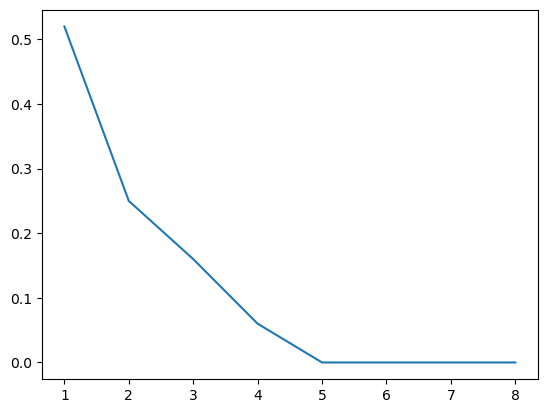

In [32]:
plt.plot(range(1, 9), eigen)

In [33]:
X_reduced = PCA(n_components=3).fit_transform(X_scaled)

Text(0.5, 1.0, 'Three blobs')

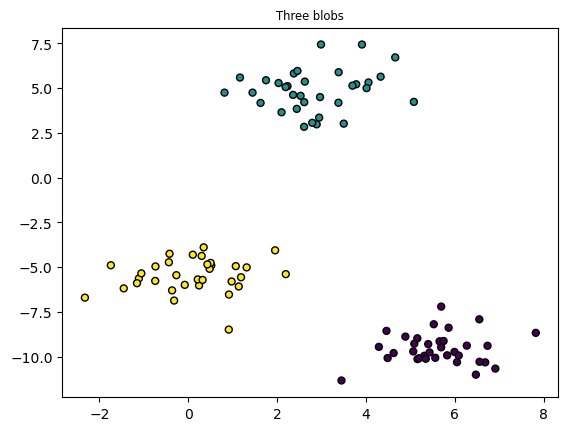

In [34]:
# https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203
# https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/
from sklearn.datasets import make_blobs
plt.title("Three blobs", fontsize='small')
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=10)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

Text(0.5, 1.0, 'Data points and cluster centroids')

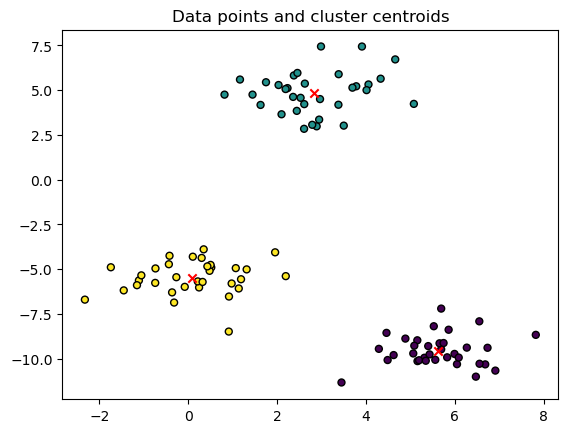

In [35]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
    
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=0).fit(X1)
# Get the cluster centroids

# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
    
plt.title('Data points and cluster centroids')
plt.show()

In [36]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [37]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ransac.html
# http://www.cse.psu.edu/~rtc12/CSE486/lecture15.pdf
# https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

## Evaluating Algorithms

In [38]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [39]:
print(data.DESCR)
data.target_names

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

array(['malignant', 'benign'], dtype='<U9')

In [40]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy


LogisticRegression(random_state=0)

0.958041958041958

In [44]:
cm = confusion_matrix(Y_test, Y_pred)
cm
# tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
#TN, FP, FN, TP
# 


array([[50,  3],
       [ 3, 87]])

In [45]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
tn
fp
fn
tp

50

3

3

87

In [46]:
# 380 b
# 20 m

TN = 380
TP = 0

TN, FP, FN, TP

https://stackoverflow.com/questions/56078203/why-scikit-learn-confusion-matrix-is-reversed

[[True Negative, False Positive] 
[False Negative, True Positive]]

In [47]:
Y_pred
Y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [48]:

results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.97      0.97      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [49]:
# precision measures how accurate our positive predictions were
# precision = tp / (tp+fp)

# recall measures what fraction of the positives our model identfied
# recall = tp / (tp+fn)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

KNeighborsClassifier()

/Users/hemanththaluru/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.951048951048951

array([[47,  6],
       [ 1, 89]])

In [51]:
print(accuracy)

0.951048951048951


In [52]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        53
           1       0.94      0.99      0.96        90

    accuracy                           0.95       143
   macro avg       0.96      0.94      0.95       143
weighted avg       0.95      0.95      0.95       143



In [53]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(kernel='linear', random_state=0)

0.972027972027972

array([[51,  2],
       [ 2, 88]])

In [54]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.98      0.98      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [55]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

SVC(random_state=0)

0.965034965034965

array([[50,  3],
       [ 2, 88]])

In [56]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143



In [57]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

GaussianNB()

0.916083916083916

array([[47,  6],
       [ 6, 84]])

In [58]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        53
           1       0.93      0.93      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143



In [59]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

DecisionTreeClassifier(criterion='entropy', random_state=0)

0.958041958041958

array([[51,  2],
       [ 4, 86]])

In [60]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.98      0.96      0.97        90

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

from sklearn.metrics import fbeta_score
output = fbeta_score(Y_test, Y_pred, average='macro', beta=0.5)
output

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

0.972027972027972

array([[52,  1],
       [ 3, 87]])

0.9682719241542771

In [62]:
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.99      0.97      0.98        90

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
accuracy
cm = confusion_matrix(Y_test, Y_pred)
cm

LogisticRegression(random_state=0)

0.9649122807017544

array([[45,  2],
       [ 2, 65]])

In [64]:
from sklearn.metrics import classification_report
results = classification_report(Y_test, Y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [65]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(Y_test, Y_pred)


from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred)

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic example')

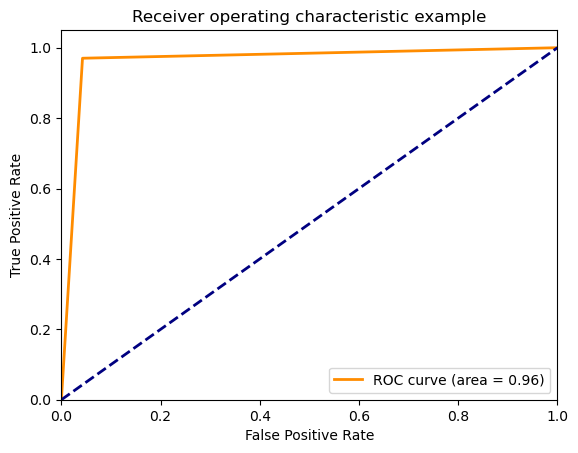

In [66]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

Ref: https://datascience-enthusiast.com/Python/ROC_Precision-Recall.html

In [67]:
from sklearn.datasets import make_classification 
X, Y = make_classification(n_samples=100, n_features=4, weights = [0.90, 0.1], random_state=0)

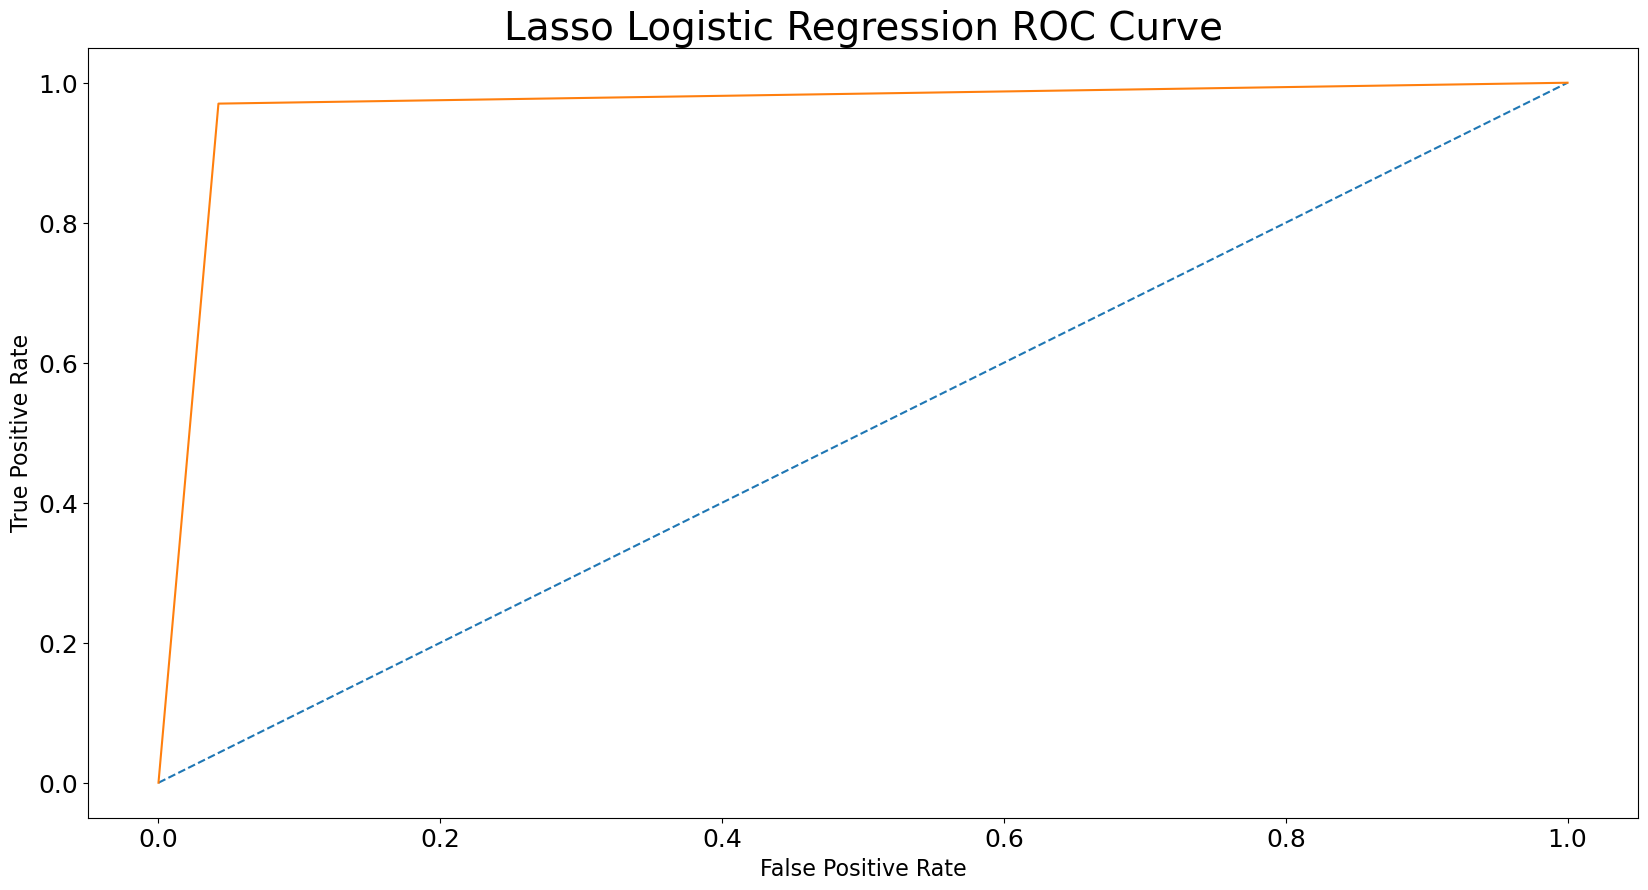

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression ROC Curve', fontsize = 28)
plt.show();

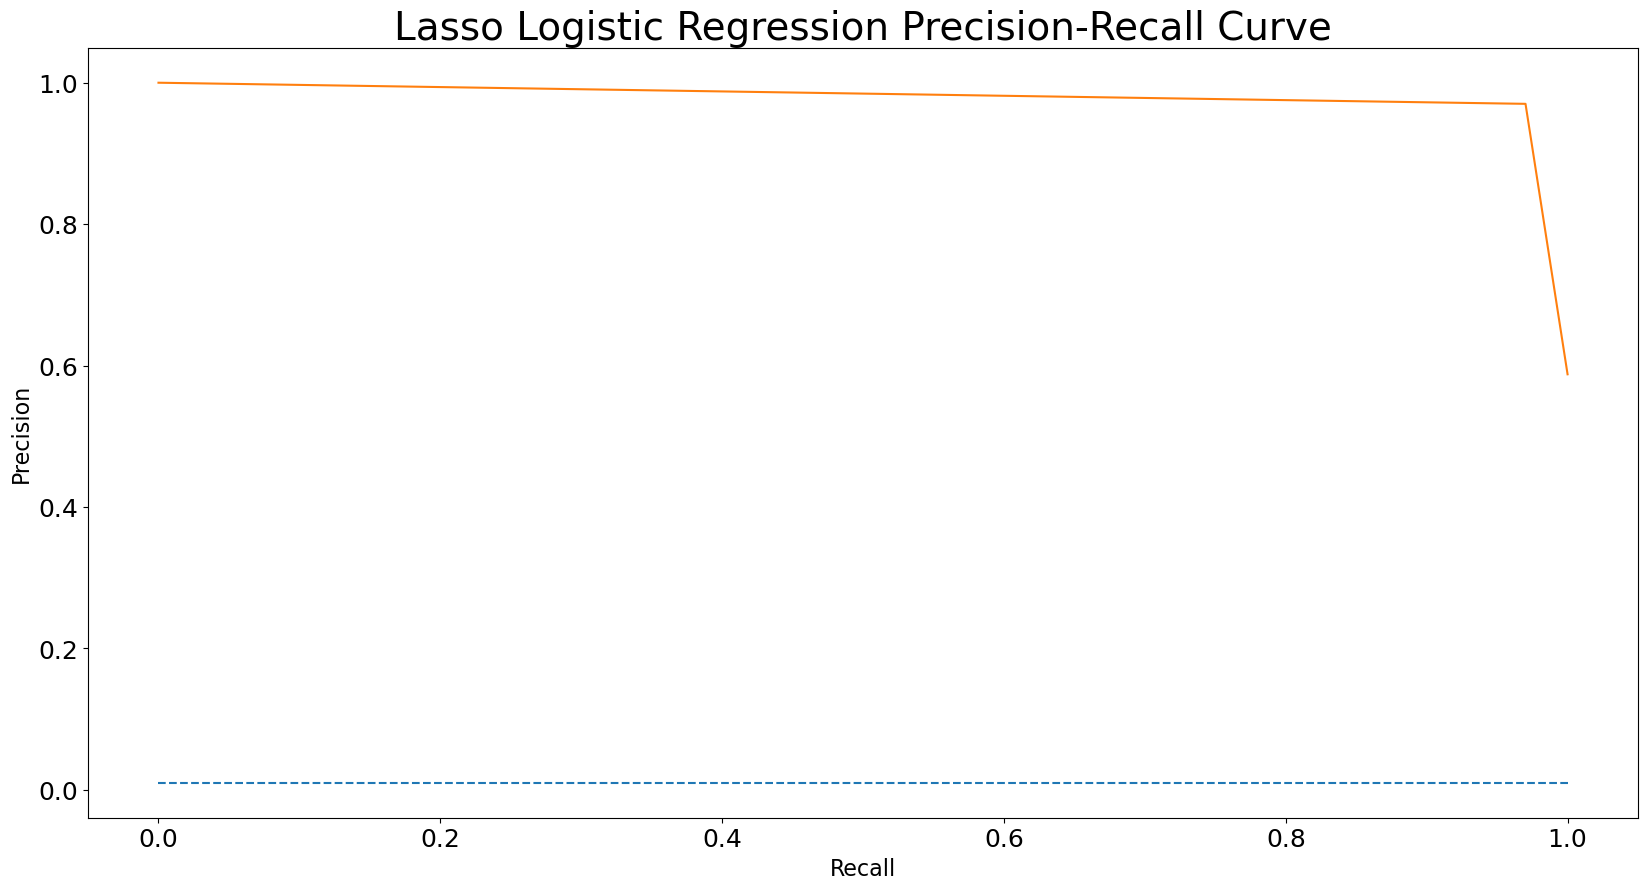

In [69]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
plt.figure(figsize = (20,10))
plt.plot([0, 1], [0.01/0.98, 0.01/0.98], linestyle = '--')
plt.plot(recall, precision)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.title('Lasso Logistic Regression Precision-Recall Curve', fontsize = 28)
plt.show();

In [70]:
len(data.target)

569

In [71]:
sum(data.target)

357

In [72]:
569-357

212

In [73]:
212/569

0.37258347978910367